In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
train1_df = pd.read_csv("../input/train_1.csv").fillna(0)

In [3]:
train1_df = train1_df.drop('Page', axis=1)

In [4]:
random_row = train1_df.iloc[90000,:].values
X = random_row[0:549]
Y = random_row[1:550]

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [6]:
sc = MinMaxScaler()
X_train = X_train.reshape((-1, 1))
Y_train = Y_train.reshape((-1, 1))
X_train = sc.fit_transform(X_train)
Y_train  = sc.fit_transform(Y_train)

In [7]:
X_train = np.reshape(X_train, (384,1,1))

In [8]:
lstm_impl = Sequential()
lstm_impl.add(LSTM(8, activation='tanh', input_shape=(None,1)))
lstm_impl.add(Dense(units=1))
lstm_impl.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
lstm_impl.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [9]:
lstm_impl.fit(X_train, Y_train, batch_size=10, epochs=100, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0090 - acc: 0.9349
Epoch 2/100
384/384 [==============================] - 0s 330us/step - loss: 0.0088 - acc: 0.9349
Epoch 3/100
384/384 [==============================] - 0s 300us/step - loss: 0.0087 - acc: 0.9349
Epoch 4/100
384/384 [==============================] - 0s 319us/step - loss: 0.0085 - acc: 0.9349
Epoch 5/100
384/384 [==============================] - 0s 314us/step - loss: 0.0084 - acc: 0.9349
Epoch 6/100
384/384 [==============================] - 0s 314us/step - loss: 0.0083 - acc: 0.9349
Epoch 7/100
384/384 [==============================] - 0s 322us/step - loss: 0.0082 - acc: 0.9349
Epoch 8/100
384/384 [==============================] - 0s 319us/step - loss: 0.0081 - acc: 0.9349
Epoch 9/100
384/384 [==============================] - 0s 360us/step - loss: 0.0079 - acc: 0.9349
Epoch 10/100
384/384 [==============================] - 0s 343us/step - 

In [10]:
inputs = X_test
inputs = np.reshape(X_test, (-1,1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (165,1,1))

In [11]:
Y_predicit = lstm_impl.predict(inputs)
Y_predicit = sc.inverse_transform(Y_predicit)

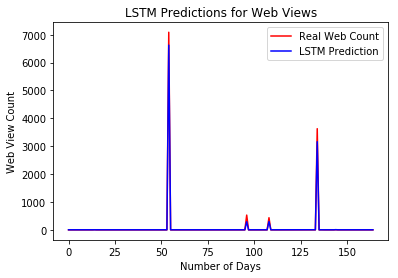

In [12]:
plt.figure
plt.plot(Y_test, color='red', label='Real Web Count')
plt.plot(Y_predicit, color='blue', label='LSTM Prediction')
plt.title('LSTM Predictions for Web Views')
plt.xlabel('Number of Days')
plt.ylabel('Web View Count')
plt.legend()
plt.show()